# **Iris Dataset: Flower Classification with PyTorch 🌸**

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Proin semper, sem ut pulvinar pulvinar, est leo pretium sem, vel varius erat orci quis turpis. Aliquam augue orci, semper at mi vel, auctor fermentum ipsum. Nulla hendrerit hendrerit consequat. Vestibulum interdum, dolor id ultricies hendrerit, leo purus dignissim mauris, sit amet maximus nunc mauris eu mi. Quisque hendrerit ante eget pharetra iaculis. Nunc ullamcorper ante quam, non laoreet urna cursus eget. In hac habitasse platea dictumst. Donec ac risus consectetur, euismod magna sit amet, elementum justo. Sed non nisl lacinia, gravida odio ac, vehicula felis. Morbi non accumsan diam. Aenean nibh nunc, pulvinar quis vestibulum ac, tincidunt efficitur nibh. Maecenas vitae molestie leo. Pellentesque varius at felis vitae tristique. Nunc rutrum nisl sagittis velit finibus congue.

**Authors:**
- [Daniel Valdez](https://github.com/Danval-003)
- [Andrea Ramirez](https://github.com/Andrea-gt)
- [Adrian Flores](https://github.com/adrianRFlores)

***

## **(1) Import Libraries** ⬇️

In [97]:
# Data manipulation and visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torchsummary import summary
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import time
import random

# Standard libraries
import warnings
warnings.filterwarnings('ignore')

# ===== ===== Reproducibility Seed ===== =====
# Set a fixed seed for the random number generator for reproducibility
random_state = 42

# Set matplotlib inline
%matplotlib inline

# Set default figure size
plt.rcParams['figure.figsize'] = (6, 4)

# Define custom color palette
palette = sns.color_palette("viridis", 12)

# Set the style of seaborn
sns.set(style="whitegrid")

torch.manual_seed(random_state)
random.seed(random_state)
np.random.seed(random_state)

# For CUDA (if using GPU)
if torch.cuda.is_available():
    torch.cuda.manual_seed(random_state)

## **[Part 1]**

### **(2) Data Upload** 📄

In [79]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Display the first few rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### **(3) Data Splitting Process**

In [80]:
X = df[iris.feature_names].values
y = df['species'].values

In [81]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

Se formatea la data para facilitar el procesamiento según la función de perdida.

In [82]:
# Convert the training feature set to a FloatTensor
X_train = torch.FloatTensor(X_train)

# Convert the test feature set to a FloatTensor
X_test = torch.FloatTensor(X_test)

# Convert the training labels to a LongTensor
y_train = torch.LongTensor(y_train)

# Convert the test labels to a LongTensor
y_test = torch.LongTensor(y_test)

### **(4) Designing the Model Architecture 🔨**

In [83]:
class Net(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Net, self).__init__()
        # Input layer: transforms input_dim to 16-dimensional space
        self.input_layer = nn.Linear(input_dim, 16)
        # Hidden layer: transforms 16-dimensional space to 8-dimensional space
        self.hidden_layer = nn.Linear(16, 8)
        # Output layer: transforms 8-dimensional space to output_dim
        self.output_layer = nn.Linear(8, output_dim)

    def forward(self, input_value):
        # Apply ReLU activation after input layer
        output = F.relu(self.input_layer(input_value))
        # Apply ReLU activation after hidden layer
        output = F.relu(self.hidden_layer(output))
        # Output layer without log-softmax (logits)
        output = self.output_layer(output)
        return output  # Return logits directly

**Observaciones 💡 -->**

> - El modelo **Net**, diseñado para clasificar datos del conjunto de datos Iris, consiste en una red neuronal con tres capas lineales: la primera capa transforma el vector de entrada de características (con dimensiones definidas por input_dim) a un espacio de 16 dimensiones, la segunda capa reduce esta dimensionalidad a 8 unidades, y la tercera capa ajusta la salida final al número de clases en el conjunto de datos Iris (output_dim). Como se puede observar, dado que es una tarea bastante sencilla de clasificación (se sabe que el dataset Iris permite que varios modelos exhiban un desempeño excelente) se han colocado pocas neuronas a las capas del modelo para evitar que este sea innecesariamente complejo.

> - En el método forward, se aplican activaciones ReLU después de las dos primeras capas lineales para introducir no linealidades, y se utiliza log_softmax en la capa de salida para convertir los logits en probabilidades logarítmicas.

In [38]:
model = Net(input_dim=4, output_dim=3)

In [39]:
# Move the model to the appropriate device (e.g., GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Print the summary
summary(model, input_size=(4,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 16]              80
            Linear-2                    [-1, 8]             136
            Linear-3                    [-1, 3]              27
Total params: 243
Trainable params: 243
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [40]:
# Move training and testing data to the specified device (GPU or CPU)
X_train = X_train.to(device)  # Transfer training features to the device
y_train = y_train.to(device)  # Transfer training labels to the device
X_test = X_test.to(device)    # Transfer testing features to the device
y_test = y_test.to(device)    # Transfer testing labels to the device

### **(5) Testing Different Loss Functions**

Para escoger las funciones de loss a implementar estaré utilizando la siguiente referencia --> https://neptune.ai/blog/pytorch-loss-functions

In [41]:
# Define the learning rate
learning_rate = 0.01   # How fast the model reaches optimal parameters
# Optimization (find parameters that minimize error)
opt = torch.optim.Adam(model.parameters(), lr=learning_rate)
# List of potential loss functions to experiment with
loss_functions = [nn.CrossEntropyLoss(), nn.KLDivLoss(), nn.NLLLoss()]

In [42]:
def test_loss(model, X_train, y_train, X_test, y_test, optimizer, criterion, epochs=100):
    # Lists to store loss and accuracy values for plotting
    train_loss_list = []
    test_loss_list = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        # Set model to training mode
        model.train()
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(X_train)

        # Apply log_softmax if criterion is NLLLoss or KLDivLoss
        if isinstance(criterion, nn.NLLLoss):
            outputs = F.log_softmax(outputs, dim=1)

        # Apply log_softmax if criterion is KLDivLoss
        if isinstance(criterion, nn.KLDivLoss):
          # Convert y_train to probabilities
          outputs = F.log_softmax(outputs, dim=1)
          y_train = F.one_hot(y_train, num_classes=outputs.size(1)).float()

        # Compute training loss
        train_loss = criterion(outputs, y_train)
        train_loss_list.append(train_loss.item())
        # Backward pass and optimize
        train_loss.backward()
        optimizer.step()

        with torch.no_grad():
            # Compute train accuracies based on the criterion
            if isinstance(criterion, (nn.CrossEntropyLoss, nn.NLLLoss)):
              _, predicted = torch.max(outputs, 1)
              accuracy = accuracy_score(y_train, predicted)
              train_accuracies.append(accuracy)

            elif isinstance(criterion, nn.KLDivLoss):
              # For KLDivLoss, convert outputs to probabilities for accuracy calculation
              probabilities = torch.exp(outputs)
              _, predicted = torch.max(probabilities, 1)
              # Convert y_train back to class indices for accuracy calculation
              y_train = torch.argmax(y_train, dim=1)
              accuracy = accuracy_score(y_train, predicted)
              train_accuracies.append(accuracy)

        # Set model to evaluation mode
        model.eval()
        # Forward pass for test data
        with torch.no_grad():
            test_outputs = model(X_test)

            # Apply log_softmax if criterion is NLLLoss
            if isinstance(criterion, nn.NLLLoss):
              test_outputs = F.log_softmax(test_outputs, dim=1)

            # Apply log_softmax if criterion is KLDivLoss
            if isinstance(criterion, nn.KLDivLoss):
              # Convert y_train to probabilities
              test_outputs = F.log_softmax(test_outputs, dim=1)
              y_test = F.one_hot(y_test, num_classes=test_outputs.size(1)).float()

            test_loss = criterion(test_outputs, y_test)
            test_loss_list.append(test_loss.item())

            # Compute test accuracies based on the criterion
            if isinstance(criterion, (nn.CrossEntropyLoss, nn.NLLLoss)):
              _, predicted = torch.max(test_outputs, 1)
              accuracy = accuracy_score(y_test, predicted)
              test_accuracies.append(accuracy)

            elif isinstance(criterion, nn.KLDivLoss):
              # For KLDivLoss, convert outputs to probabilities for accuracy calculation
              probabilities = torch.exp(test_outputs)
              _, predicted = torch.max(probabilities, 1)
              # Convert y_train back to class indices for accuracy calculation
              y_test = torch.argmax(y_test, dim=1)
              accuracy = accuracy_score(y_test, predicted)
              test_accuracies.append(accuracy)

            else:
                raise ValueError("Unsupported criterion for accuracy calculation")

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))

    # Plot the loss curves
    ax1.plot(range(epochs), train_loss_list, label='Training Loss', color=palette[0])
    ax1.plot(range(epochs), test_loss_list, label='Test Loss', color=palette[5])
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Test Loss Over Epochs')
    ax1.legend()

    # Plot the accuracy curves
    ax2.plot(range(epochs), train_accuracies, label='Training Accuracy', color=palette[0], linestyle='--')
    ax2.plot(range(epochs), test_accuracies, label='Test Accuracy', color=palette[5], linestyle='--')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Training and Test Accuracy Over Epochs')
    ax2.legend()

    plt.tight_layout()
    plt.show()

#### **(1) Cross Entropy Loss Function**

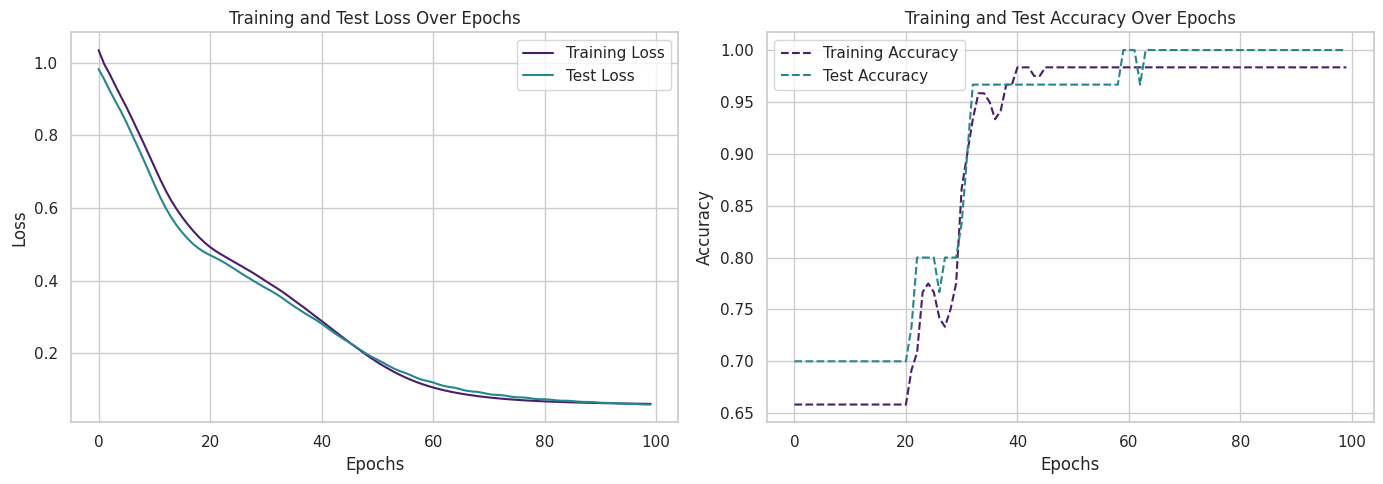

In [ ]:
test_loss(model, X_train, y_train, X_test, y_test, opt, loss_functions[0])

#### **(2) KL Divergence Loss Function**

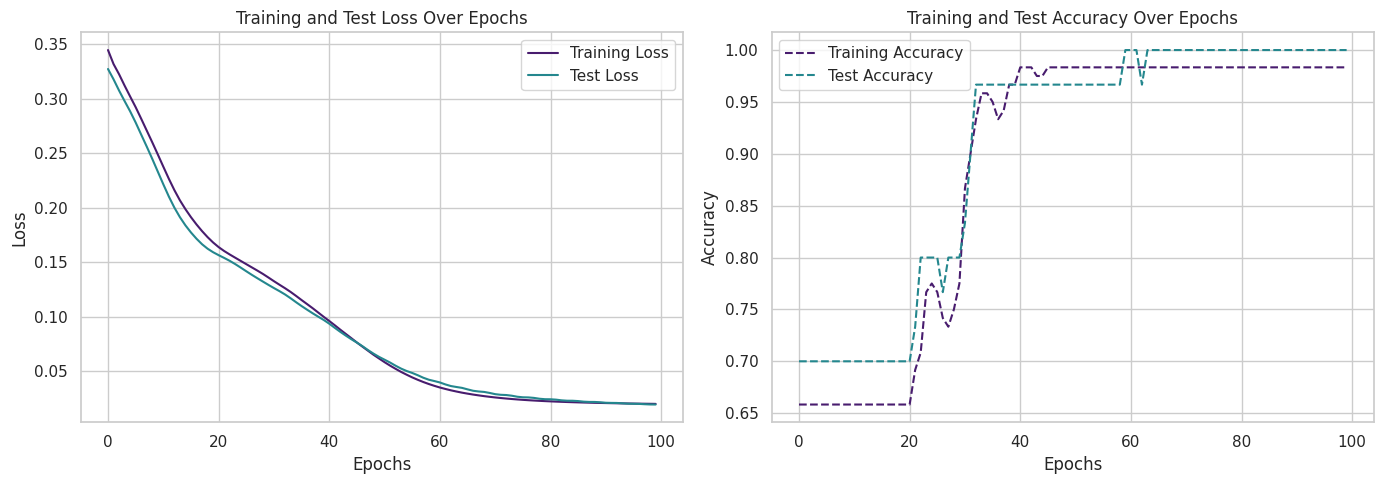

In [ ]:
test_loss(model, X_train, y_train, X_test, y_test, opt, loss_functions[1])

#### **(3) Negative Log-Likelihood Loss Function**

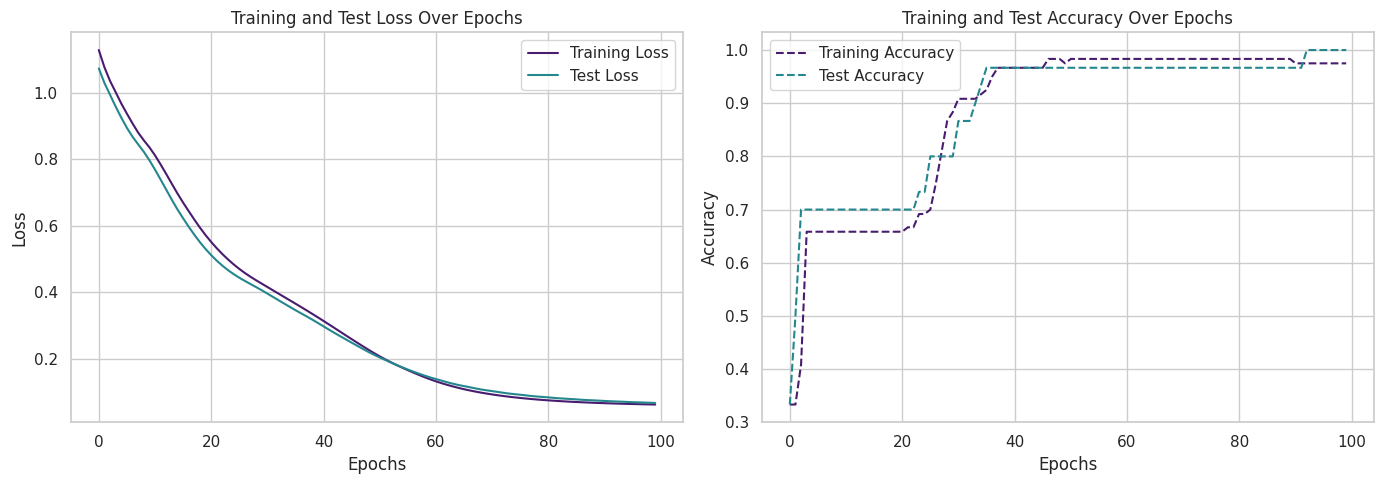

In [ ]:
test_loss(model, X_train, y_train, X_test, y_test, opt, loss_functions[2])

### **(6) Testing Different Regularization Techniques**

Para probar la aplicación de las distintas técnicas de regularización estaré utilizando la siguiente referencia --> https://medium.com/analytics-vidhya/understanding-regularization-with-pytorch-26a838d94058

In [13]:
def test_regularization(model, X_train, y_train, X_test, y_test, optimizer, criterion, regularizer=None, dropout_rate=None, epochs=100):
    # Lists to store loss and accuracy values for plotting
    train_loss_list = []
    test_loss_list = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        # Set model to training mode
        model.train()
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(X_train)

        # Apply manual dropout during training if specified
        if regularizer == 'dropout' and dropout_rate is not None:
            outputs = F.dropout(outputs, p=dropout_rate, training=True)

        # Compute training loss
        train_loss = criterion(outputs, y_train)

        # Apply L1 regularization if specified
        if(regularizer == 'l1'):
          l1_loss = l1_regularization(model)
          train_loss = train_loss + l1_loss

        train_loss_list.append(train_loss.item())
        # Backward pass and optimize
        train_loss.backward()
        optimizer.step()

        with torch.no_grad():
            # Compute train accuracies based on the criterion
            if isinstance(criterion, (nn.CrossEntropyLoss)):
              _, predicted = torch.max(outputs, 1)
              accuracy = accuracy_score(y_train, predicted)
              train_accuracies.append(accuracy)

        # Set model to evaluation mode
        model.eval()
        # Forward pass for test data
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            # Apply L1 regularization if specified
            if(regularizer == 'l1'):
              l1_loss = l1_regularization(model)
              test_loss = test_loss + l1_loss

            test_loss_list.append(test_loss.item())

            # Compute test accuracies based on the criterion
            if isinstance(criterion, nn.CrossEntropyLoss):
              _, predicted = torch.max(test_outputs, 1)
              accuracy = accuracy_score(y_test, predicted)
              test_accuracies.append(accuracy)

            else:
                raise ValueError("Unsupported criterion for accuracy calculation")

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))

    # Plot the loss curves
    ax1.plot(range(epochs), train_loss_list, label='Training Loss', color=palette[0])
    ax1.plot(range(epochs), test_loss_list, label='Test Loss', color=palette[5])
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Test Loss Over Epochs')
    ax1.legend()

    # Plot the accuracy curves
    ax2.plot(range(epochs), train_accuracies, label='Training Accuracy', color=palette[0], linestyle='--')
    ax2.plot(range(epochs), test_accuracies, label='Test Accuracy', color=palette[5], linestyle='--')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Training and Test Accuracy Over Epochs')
    ax2.legend()

    plt.tight_layout()
    plt.show()

#### **(1) L1 Regularization**

In [14]:
def l1_regularization(model, lambda_l1=0.01):
    # Initialize the L1 loss variable
    l1_loss = 0
    # Iterate over all parameters of the model
    for param in model.parameters():
        # Accumulate the sum of absolute values of the parameters
        l1_loss += torch.sum(torch.abs(param))
    # Compute the regularization loss by scaling with lambda_l1
    l1_penalty = lambda_l1 * l1_loss
    return l1_penalty

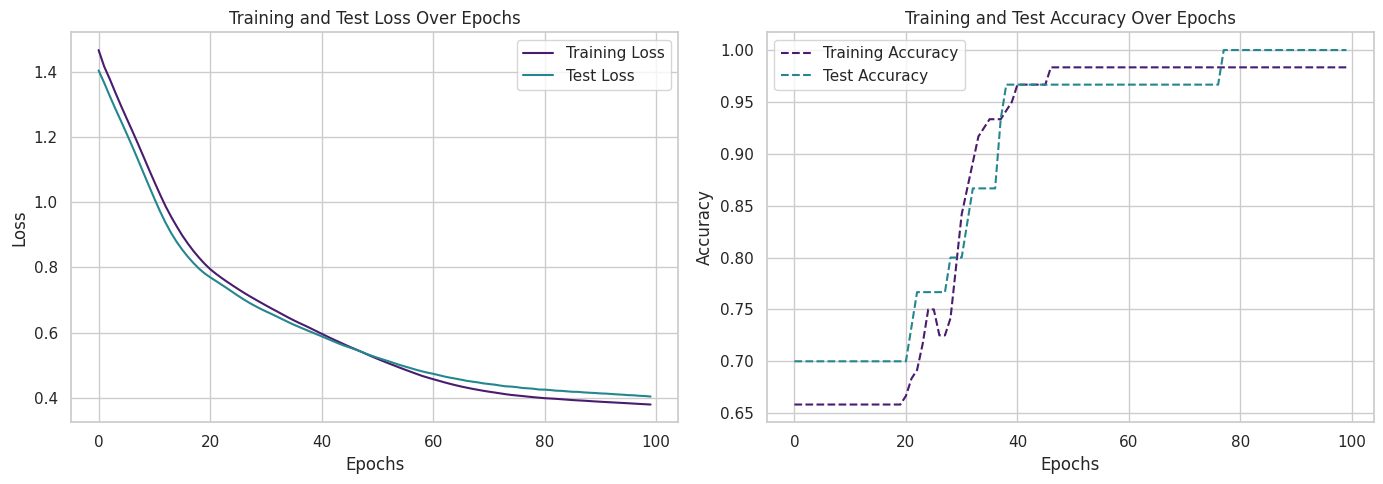

In [ ]:
test_regularization(model, X_train, y_train, X_test, y_test, opt, loss_functions[0], 'l1')

#### **(2) L2 Regularization**

In [ ]:
opt = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.01)

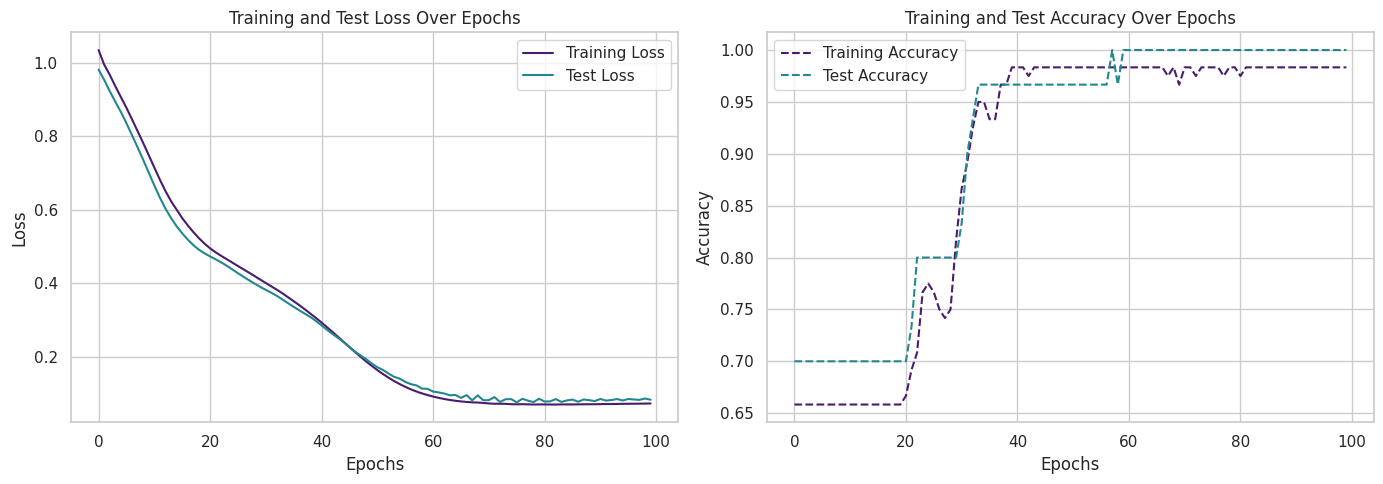

In [ ]:
test_regularization(model, X_train, y_train, X_test, y_test, opt, loss_functions[0], 'l2')

#### **(3) Dropout**

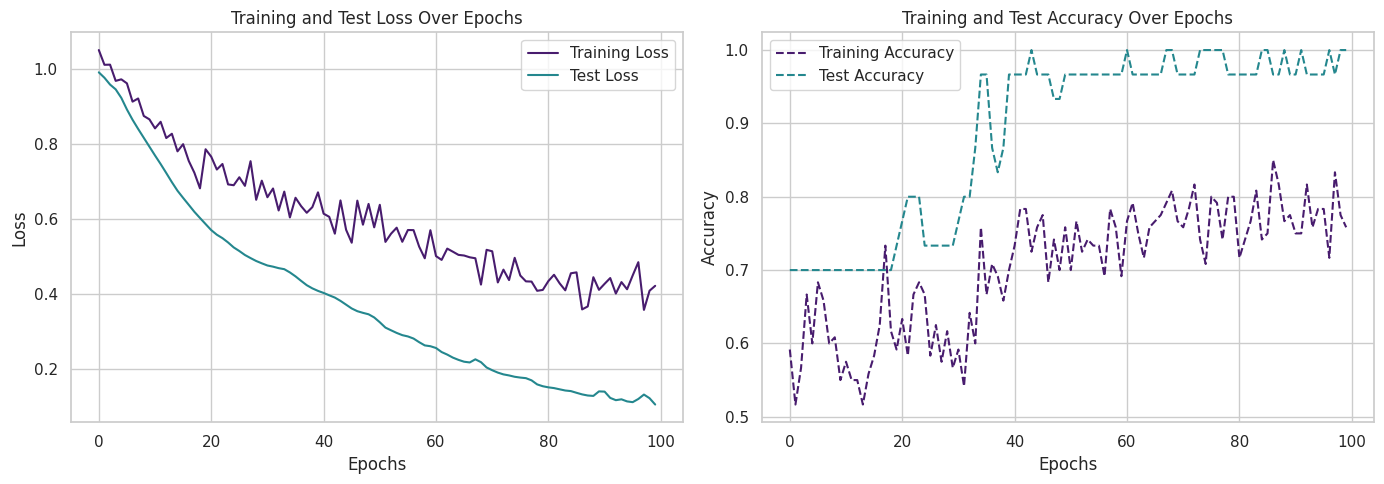

In [ ]:
# Call the test_regularization function with dropout of 0.5
# the value may be modified! Please take this into consideration
# when running this notebook
test_regularization(model=model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                    optimizer=opt, criterion= loss_functions[0], regularizer='dropout', dropout_rate=0.5, epochs=100)

### **(7) Testing Different Optimization Algorithms**

#### **(1) Adam Optimization Algorithm**

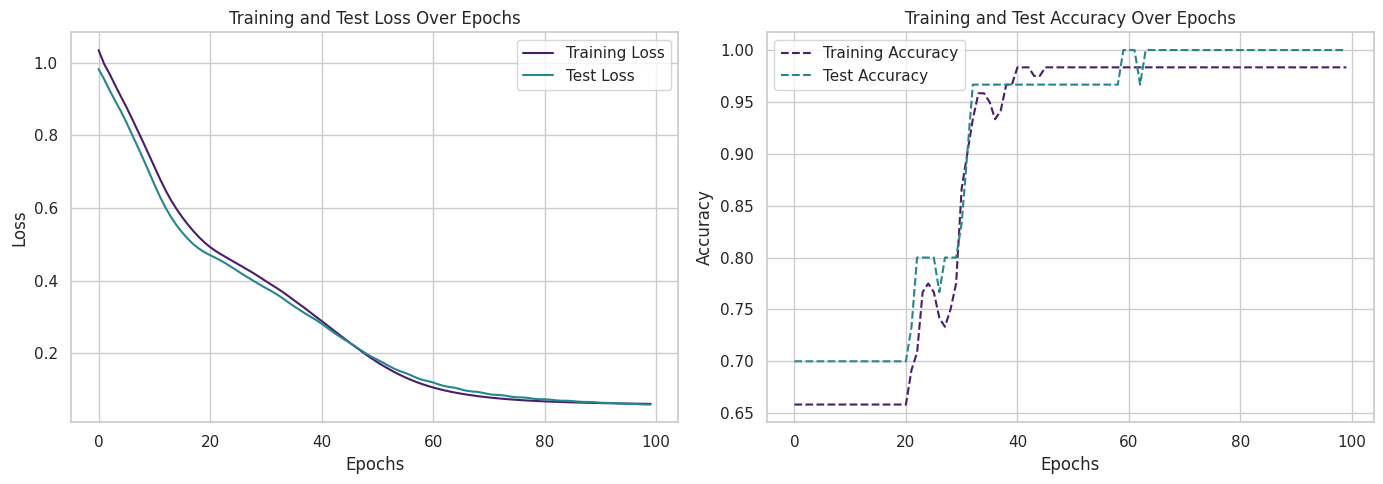

In [ ]:
test_regularization(model, X_train, y_train, X_test, y_test, opt, loss_functions[0])

#### **(2) SDG with Momentum Optimization Algorithm**

In [ ]:
opt = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

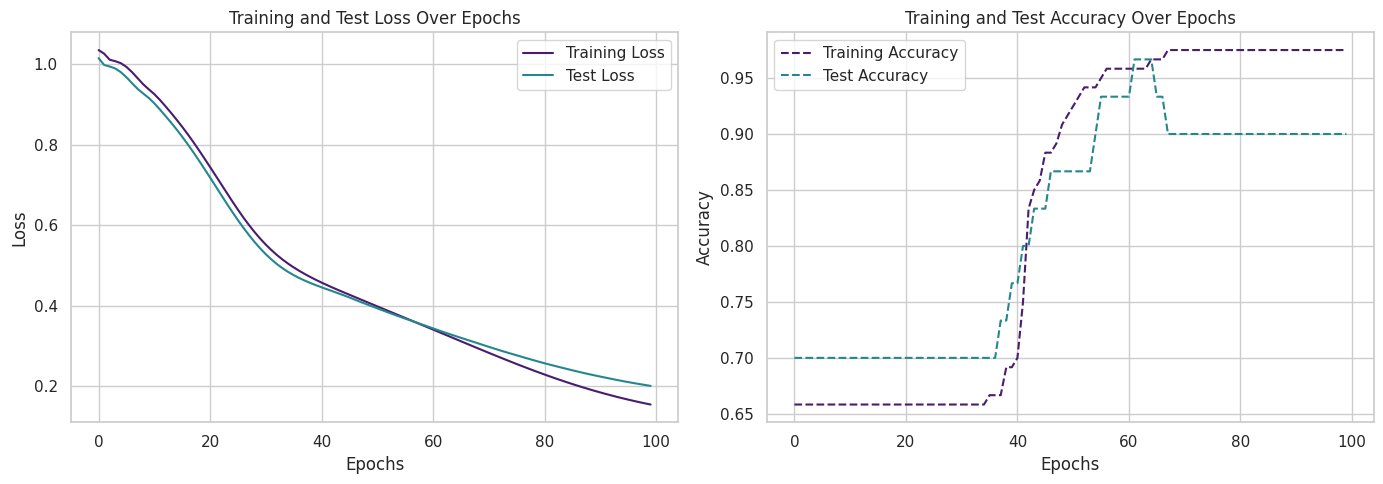

In [ ]:
test_regularization(model, X_train, y_train, X_test, y_test, opt, loss_functions[0])

#### **(3) RMS Prop Optimization Algorithm**

In [ ]:
opt = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.9, eps=1e-8)

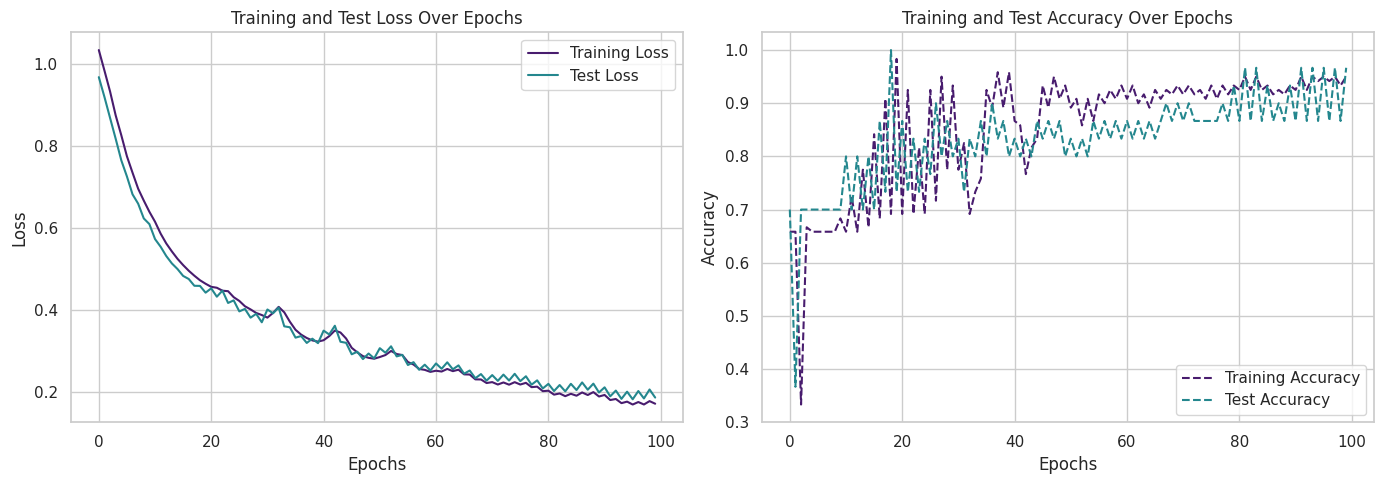

In [ ]:
test_regularization(model, X_train, y_train, X_test, y_test, opt, loss_functions[0])

### **(8) Experiment diferent models with different parameters.**

#### **(1) Function to test combinations**

In [102]:


def test_combine(model, X_train, y_train, X_test, y_test, optimizer, criterion, regularizer=None, dropout_rate=None, epochs=100, name=""):
    # Lists to store losses, accuracies, and precision for plotting
    train_loss_list = []
    test_loss_list = []
    train_accuracies = []
    test_accuracies = []
    train_precisions = []
    test_precisions = []
    timeInit = time.perf_counter()

    for epoch in range(epochs):
        # Training mode
        model.train()
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_train)

        # Apply dropout if specified
        if regularizer == 'dropout' and dropout_rate is not None:
            outputs = F.dropout(outputs, p=dropout_rate, training=True)

        # Calculate training loss
        train_loss = criterion(outputs, y_train)

        # Apply L1 regularization if specified
        if regularizer == 'l1':
            l1_loss = l1_regularization(model)
            train_loss = train_loss + l1_loss

        train_loss_list.append(train_loss.item())
        train_loss.backward()
        optimizer.step()

        # Calculate training accuracy and precision
        if isinstance(criterion, nn.CrossEntropyLoss):
            _, predicted = torch.max(outputs, 1)
            accuracy = accuracy_score(y_train.cpu(), predicted.cpu())
            precision = precision_score(y_train.cpu(), predicted.cpu(), average='weighted')
            train_accuracies.append(accuracy)
            train_precisions.append(precision)

        # Evaluation mode
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)

            if regularizer == 'l1':
                l1_loss = l1_regularization(model)
                test_loss = test_loss + l1_loss

            test_loss_list.append(test_loss.item())

            if isinstance(criterion, nn.CrossEntropyLoss):
                _, predicted = torch.max(test_outputs, 1)
                accuracy = accuracy_score(y_test.cpu(), predicted.cpu())
                precision = precision_score(y_test.cpu(), predicted.cpu(), average='weighted')
                test_accuracies.append(accuracy)
                test_precisions.append(precision)

    end_time = time.perf_counter()
    elapsed_time = end_time - timeInit
    print(name)
    print(f"Tiempo de ejecución: {elapsed_time} segundos")
    # Print last metricts
    print(f"Last train loss: {train_loss_list[-1]}")
    print(f"Last test loss: {test_loss_list[-1]}")
    print(f"Last train accuracy: {train_accuracies[-1]}")
    print(f"Last test accuracy: {test_accuracies[-1]}")
    print(f"Last train precision: {train_precisions[-1]}")
    print(f"Last test precision: {test_precisions[-1]}")

    # Plotting loss, accuracy, and precision curves
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(21, 5))
    fig.suptitle(f'Loss, Accuracy, and Precision Over Epochs - {name}')

    # Plot the loss curves
    ax1.plot(range(len(train_loss_list)), train_loss_list, label='Training Loss', color='blue')
    ax1.plot(range(len(test_loss_list)), test_loss_list, label='Test Loss', color='red')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Test Loss Over Epochs')
    ax1.legend()

    # Plot the accuracy curves
    ax2.plot(range(len(train_accuracies)), train_accuracies, label='Training Accuracy', color='blue', linestyle='--')
    ax2.plot(range(len(test_accuracies)), test_accuracies, label='Test Accuracy', color='red', linestyle='--')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Training and Test Accuracy Over Epochs')
    ax2.legend()

    # Plot the precision curves
    ax3.plot(range(len(train_precisions)), train_precisions, label='Training Precision', color='blue', linestyle='-.')
    ax3.plot(range(len(test_precisions)), test_precisions, label='Test Precision', color='red', linestyle='-.')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('Precision')
    ax3.set_title('Training and Test Precision Over Epochs')
    ax3.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def test_combinations(modelGenerator, X_train, y_train, X_test, y_test, optimizers={}, criterions={}, regularizers=[None], dropout_rate=0.5, epochs=100):
    # Check if optimizers or criterions are empty and raise an exception
    if not optimizers:
        raise ValueError("No optimizers provided")
    if not criterions:
        raise ValueError("No criterions provided")

    # Create different combinations
    combinations = []
    for name, optimizer in optimizers.items():
        for name_criterion, criterion in criterions.items():
            for regularizer in regularizers:
                name_combination = f"Opt {name} - Criterion {name_criterion}- Regularizer {str(regularizer).capitalize()}"
                combinations.append((optimizer, criterion, regularizer, name_combination))

    # Use test_combine with these combinations
    for combination in combinations:
        model = modelGenerator()
        optimizerFunc, criterion, regularizer, name = combination
        optimizer = optimizerFunc(model)
        dropout_rate_test = dropout_rate if regularizer == 'dropout' else None
        test_combine(model, X_train, y_train, X_test, y_test, optimizer, criterion, regularizer, dropout_rate_test, epochs, name)
    plt.tight_layout()
    plt.show()

def modelGenerator():
    model = Net(input_dim=4, output_dim=3)
    # Move the model to the appropriate device (e.g., GPU or CPU)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    return model


**Observaciones 💡 -->**

> - La función está diseñada para generar tres listas correspondientes a los parámetros que se pretende variar (Optimizador, Regularizador o Función de Pérdida). Dentro de esta función, se crea una lista con todas las combinaciones posibles de estos parámetros y se entrena el modelo según cada combinación.

> - Además de la precisión y la pérdida, se ha decidido incluir en las gráficas y mediciones la exactitud del modelo tanto en los datos de entrenamiento como en los de validación. Aunque la exactitud es similar a la precisión, esta métrica mide la proporción de predicciones correctas respecto al total de predicciones realizadas.

#### **(2) Test combinations**

Se evaluaron un total de 12 combinaciones posibles de algoritmos de optimización y regularización, manteniendo constante la función de pérdida. Las combinaciones se basaron en:

> - **3 tipos de algoritmos de optimización:**
    - Adam
    - SGD con Momentum
    - RMS Prop

> - **4 tipos de algoritmos de regularización:**
    - L1
    - L2
    - Dropout
    - Sin regularización

> - **1 función de pérdida fija:** Cross Entropy Loss

El análisis de estas combinaciones revela varias características significativas:

> Las combinaciones que incluyen SGD con Momentum y Dropout muestran una mayor variabilidad en las métricas del modelo. Esta inestabilidad se manifiesta como fluctuaciones más pronunciadas en las métricas evaluadas (precisión, exactitud y pérdida), lo que sugiere que estos métodos de optimización o regularización podrían estar dificultando la convergencia estable del modelo. Esta variabilidad puede indicar la necesidad de ajustar los hiperparámetros o considerar técnicas adicionales para mejorar la estabilidad del entrenamiento. Aunado al hecho que ninguno de sus modelos llega a converger.

> La combinación que demuestra el mejor desempeño en el modelo es el uso del optimizador Adam junto con el regulador L2. Esta combinación exhibe una menor variabilidad en las métricas y muestra una estabilización en la precisión, alcanzando un 100% en los valores de prueba al final de las 100 épocas, sin aparentar sobreajuste (overfitting). Esto sugiere que el modelo generaliza de manera efectiva con estos parámetros.

> Además, el modelo entrenado con Adam y L2 presenta uno de los tiempos de entrenamiento más cortos y converge más rápidamente, logrando una convergencia efectiva en aproximadamente 27 a 33 épocas, según lo observado en las gráficas. Esto indica que esta combinación no solo ofrece un buen rendimiento en términos de precisión, sino que también optimiza el tiempo de entrenamiento del modelo.

Opt Adam - Criterion Cross Entropy Loss- Regularizer None
Tiempo de ejecución: 0.7049696360008966 segundos
Last train loss: 0.0569864884018898
Last test loss: 0.05007125809788704
Last train accuracy: 0.975
Last test accuracy: 1.0
Last train precision: 0.9752083333333332
Last test precision: 1.0


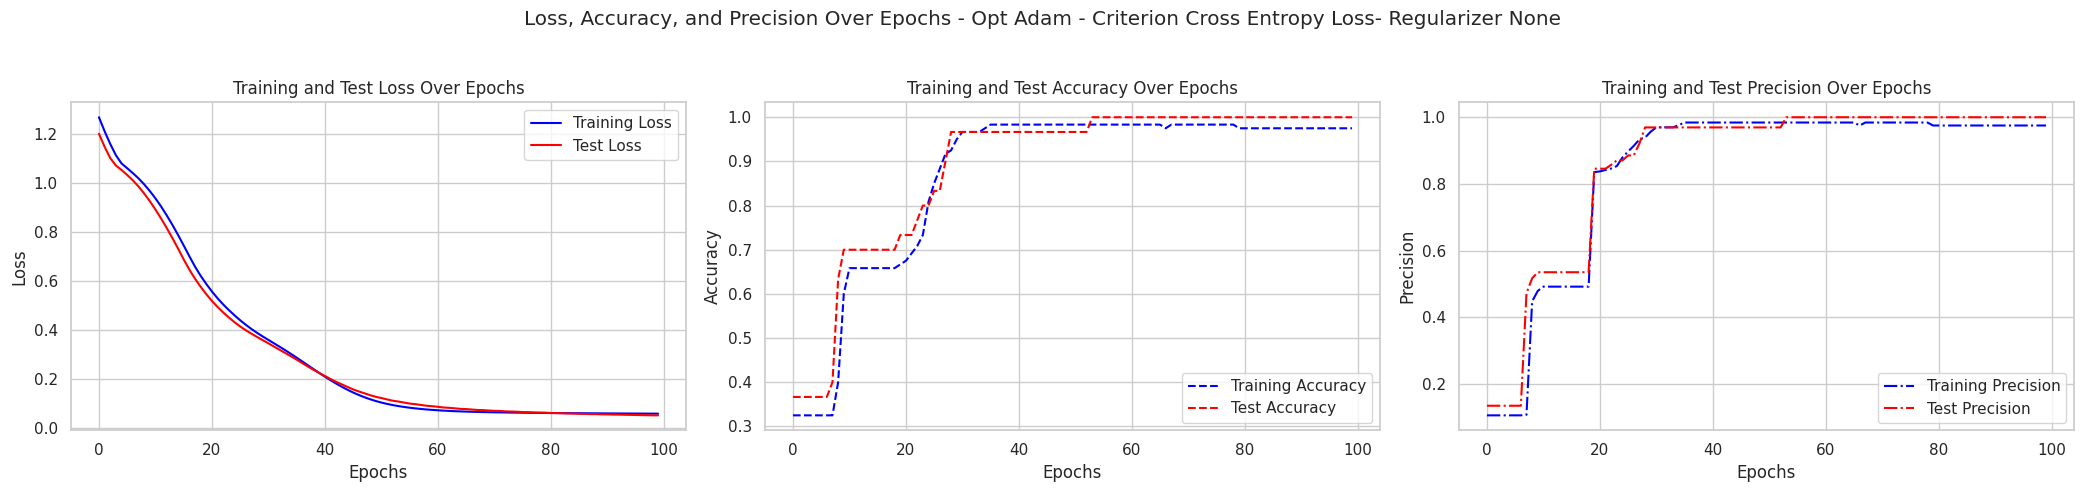

Opt Adam - Criterion Cross Entropy Loss- Regularizer L1
Tiempo de ejecución: 0.7840277909999713 segundos
Last train loss: 0.382459819316864
Last test loss: 0.39495939016342163
Last train accuracy: 0.975
Last test accuracy: 1.0
Last train precision: 0.9767857142857144
Last test precision: 1.0


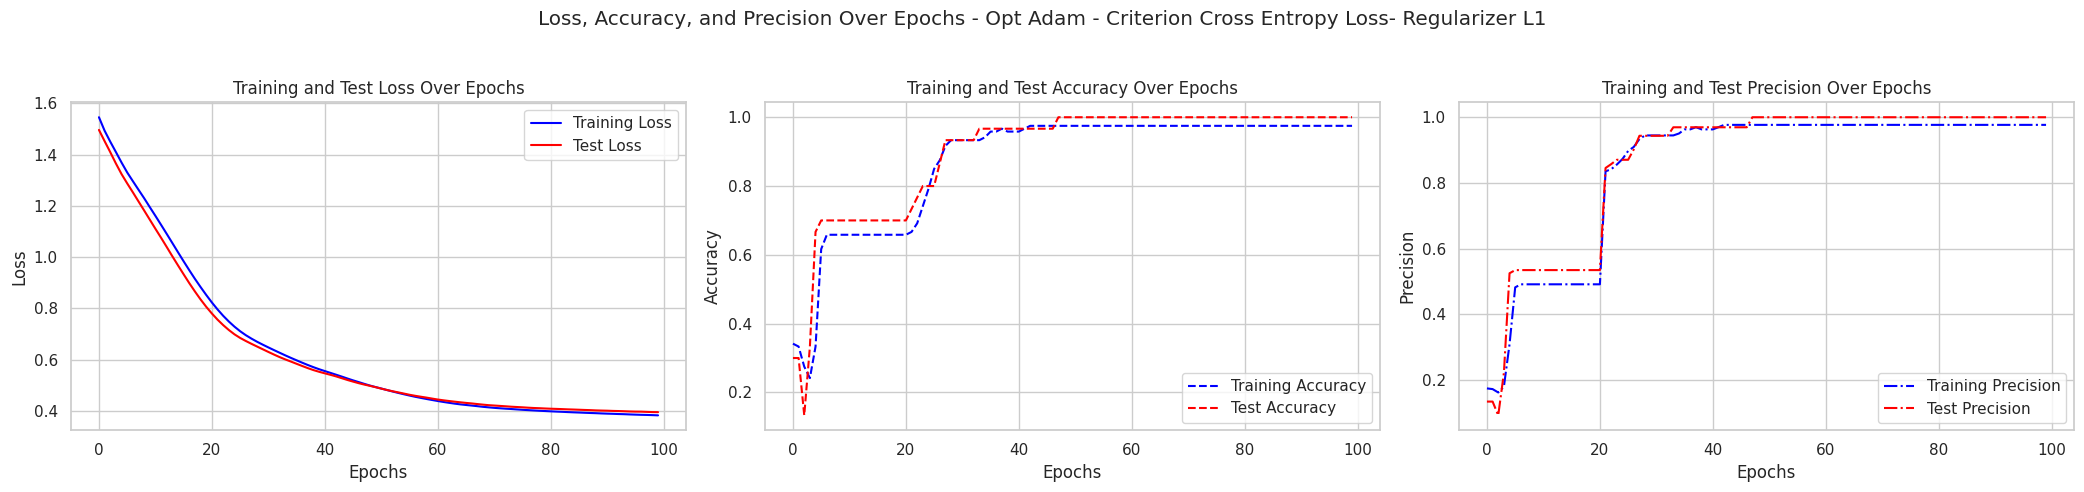

Opt Adam - Criterion Cross Entropy Loss- Regularizer L2
Tiempo de ejecución: 0.6858697409988963 segundos
Last train loss: 0.05620863288640976
Last test loss: 0.04589028283953667
Last train accuracy: 0.975
Last test accuracy: 1.0
Last train precision: 0.9752083333333332
Last test precision: 1.0


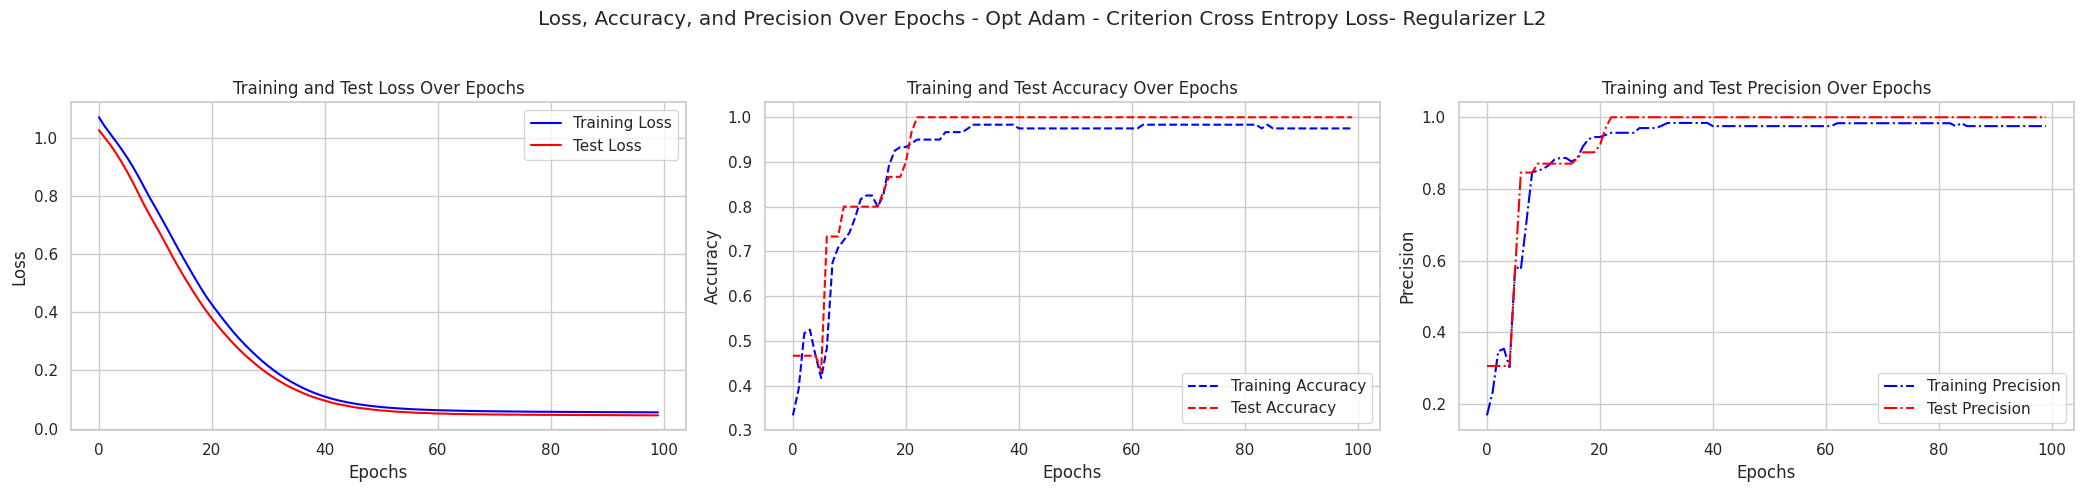

Opt Adam - Criterion Cross Entropy Loss- Regularizer Dropout
Tiempo de ejecución: 0.7331686829984392 segundos
Last train loss: 0.6191944479942322
Last test loss: 0.36207014322280884
Last train accuracy: 0.7
Last test accuracy: 0.8
Last train precision: 0.6896442224688618
Last test precision: 0.8705882352941177


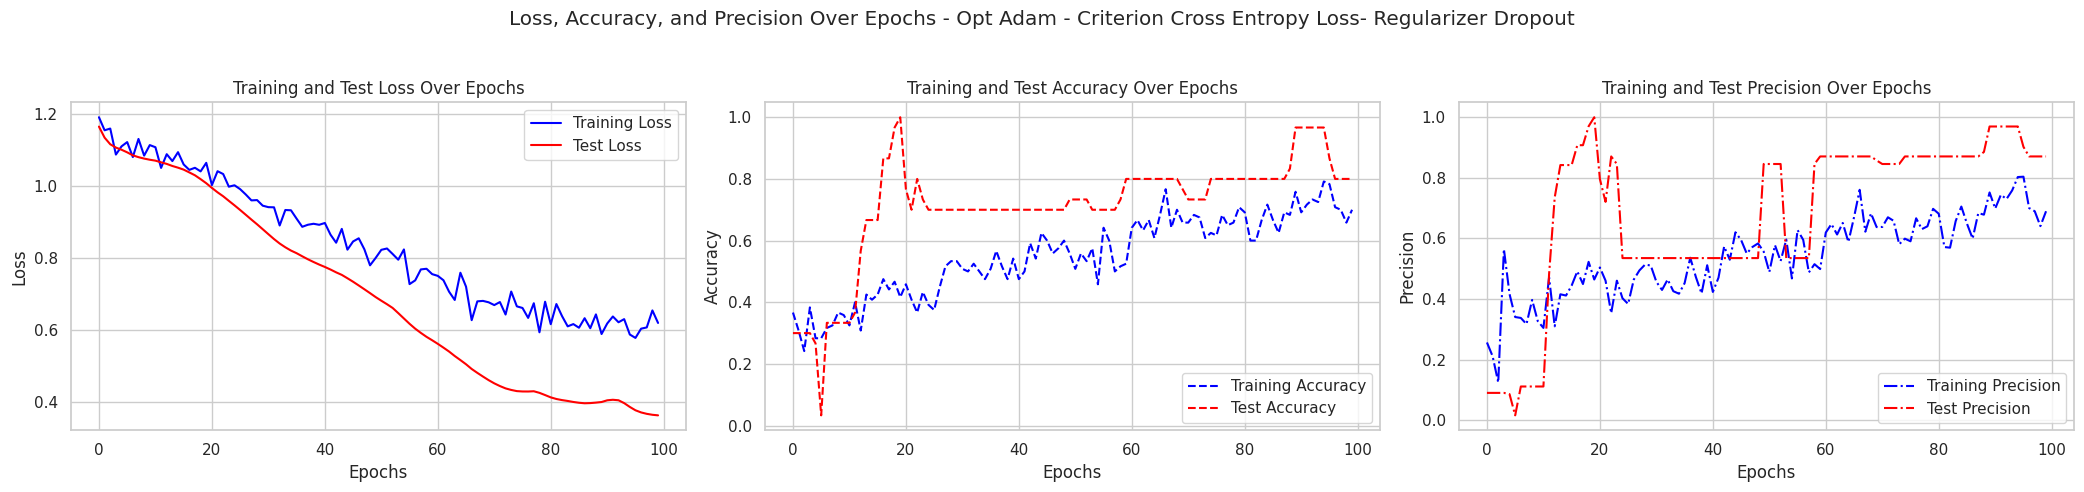

Opt RMS Prop - Criterion Cross Entropy Loss- Regularizer None
Tiempo de ejecución: 0.9726309649995528 segundos
Last train loss: 0.26736339926719666
Last test loss: 0.32446935772895813
Last train accuracy: 0.9083333333333333
Last test accuracy: 0.9666666666666667
Last train precision: 0.9208333333333335
Last test precision: 0.9694444444444444


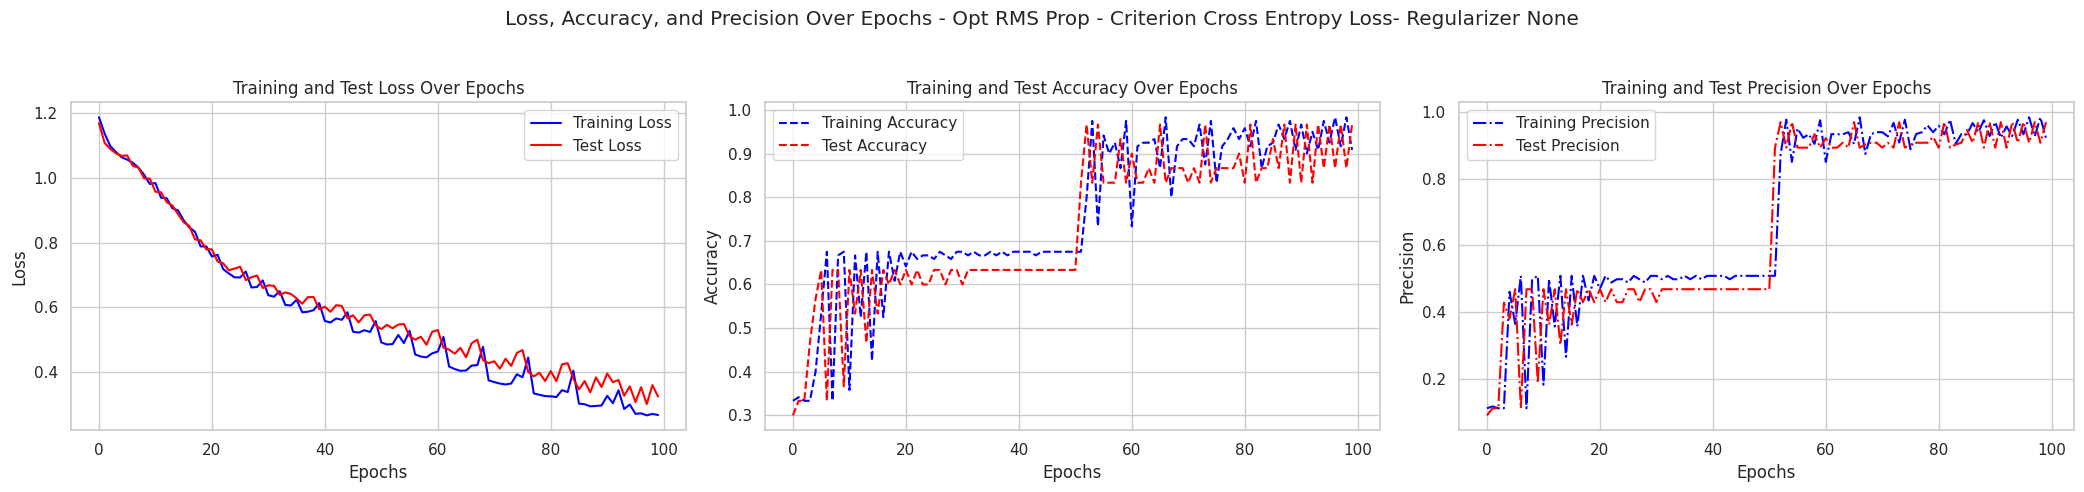

Opt RMS Prop - Criterion Cross Entropy Loss- Regularizer L1
Tiempo de ejecución: 0.7533330570004182 segundos
Last train loss: 0.4745105504989624
Last test loss: 0.47808027267456055
Last train accuracy: 0.9333333333333333
Last test accuracy: 0.9
Last train precision: 0.9392649903288202
Last test precision: 0.9214285714285714


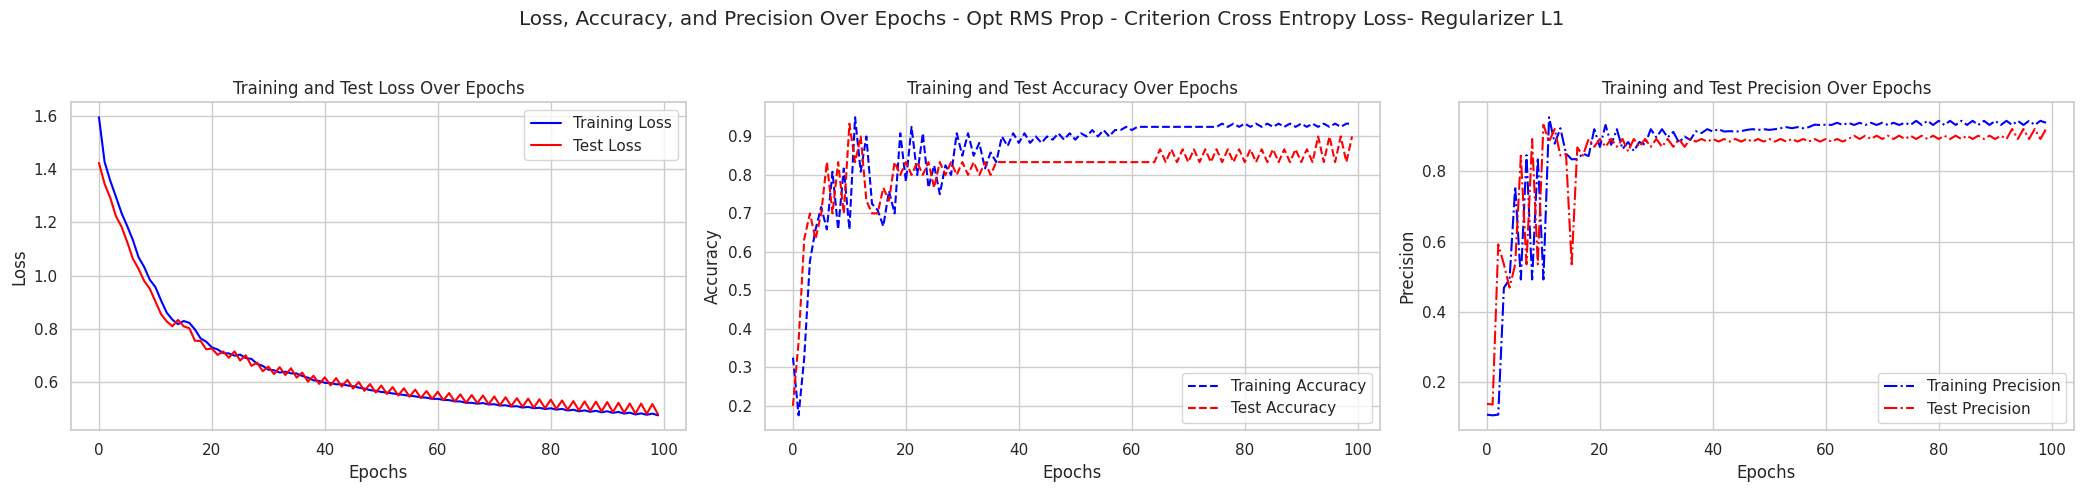

Opt RMS Prop - Criterion Cross Entropy Loss- Regularizer L2
Tiempo de ejecución: 0.7426035320004303 segundos
Last train loss: 0.12908174097537994
Last test loss: 0.11889240890741348
Last train accuracy: 0.95
Last test accuracy: 0.9666666666666667
Last train precision: 0.9527513227513228
Last test precision: 0.9694444444444444


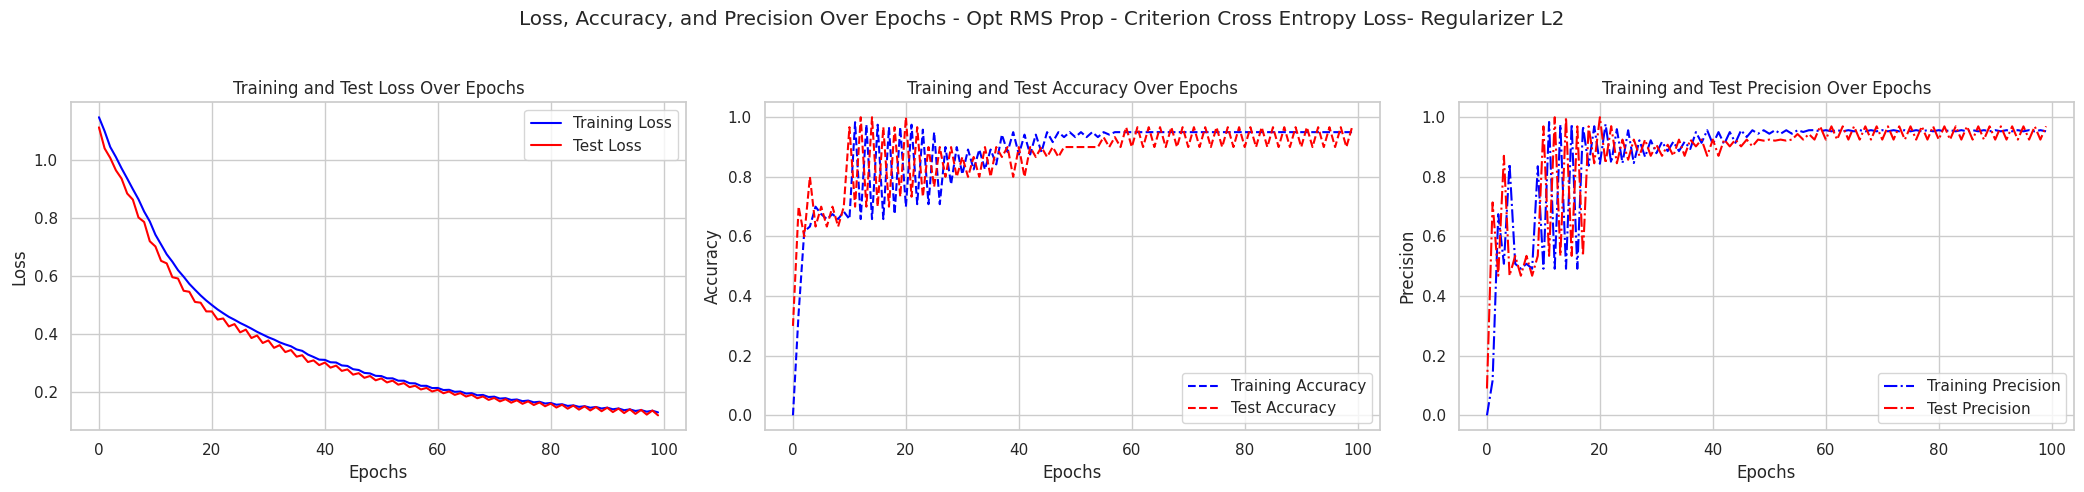

Opt RMS Prop - Criterion Cross Entropy Loss- Regularizer Dropout
Tiempo de ejecución: 0.7134008440007165 segundos
Last train loss: 0.7054662704467773
Last test loss: 0.4930802881717682
Last train accuracy: 0.6083333333333333
Last test accuracy: 0.9666666666666667
Last train precision: 0.5773272642390289
Last test precision: 0.9694444444444444


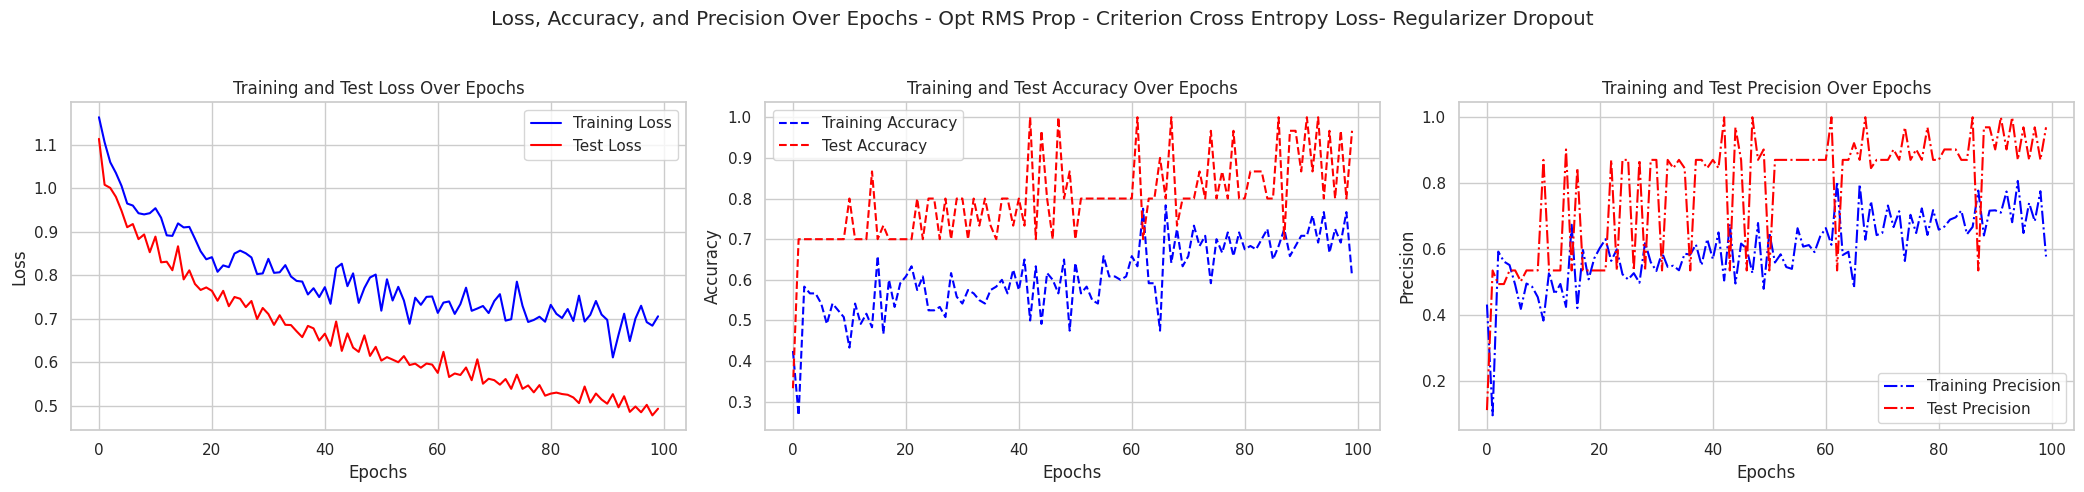

Opt SGD Momentum - Criterion Cross Entropy Loss- Regularizer None
Tiempo de ejecución: 0.7229285199991864 segundos
Last train loss: 0.4098873436450958
Last test loss: 0.39347752928733826
Last train accuracy: 0.8833333333333333
Last test accuracy: 0.8
Last train precision: 0.9141509433962264
Last test precision: 0.8705882352941177


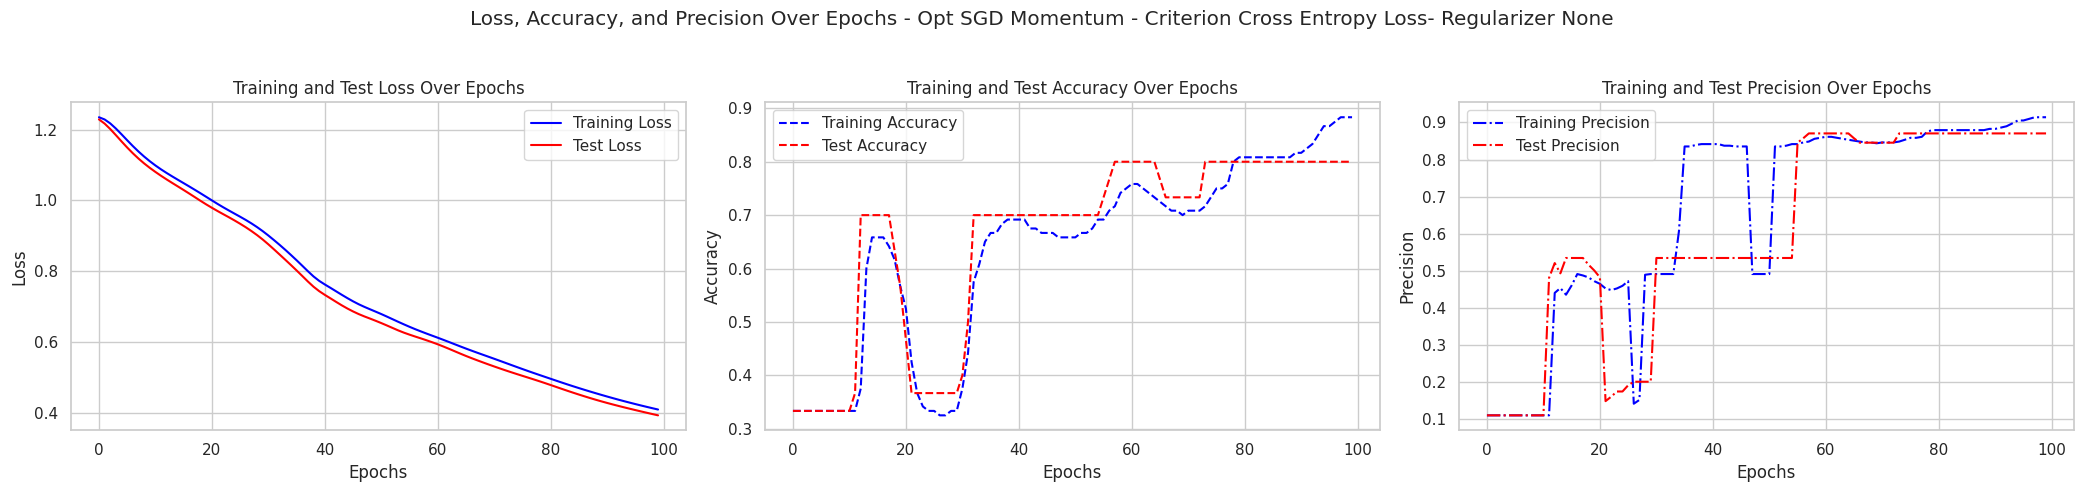

Opt SGD Momentum - Criterion Cross Entropy Loss- Regularizer L1
Tiempo de ejecución: 0.776267020000887 segundos
Last train loss: 0.5687956809997559
Last test loss: 0.5905274152755737
Last train accuracy: 0.9666666666666667
Last test accuracy: 0.9666666666666667
Last train precision: 0.9697674418604652
Last test precision: 0.9700000000000001


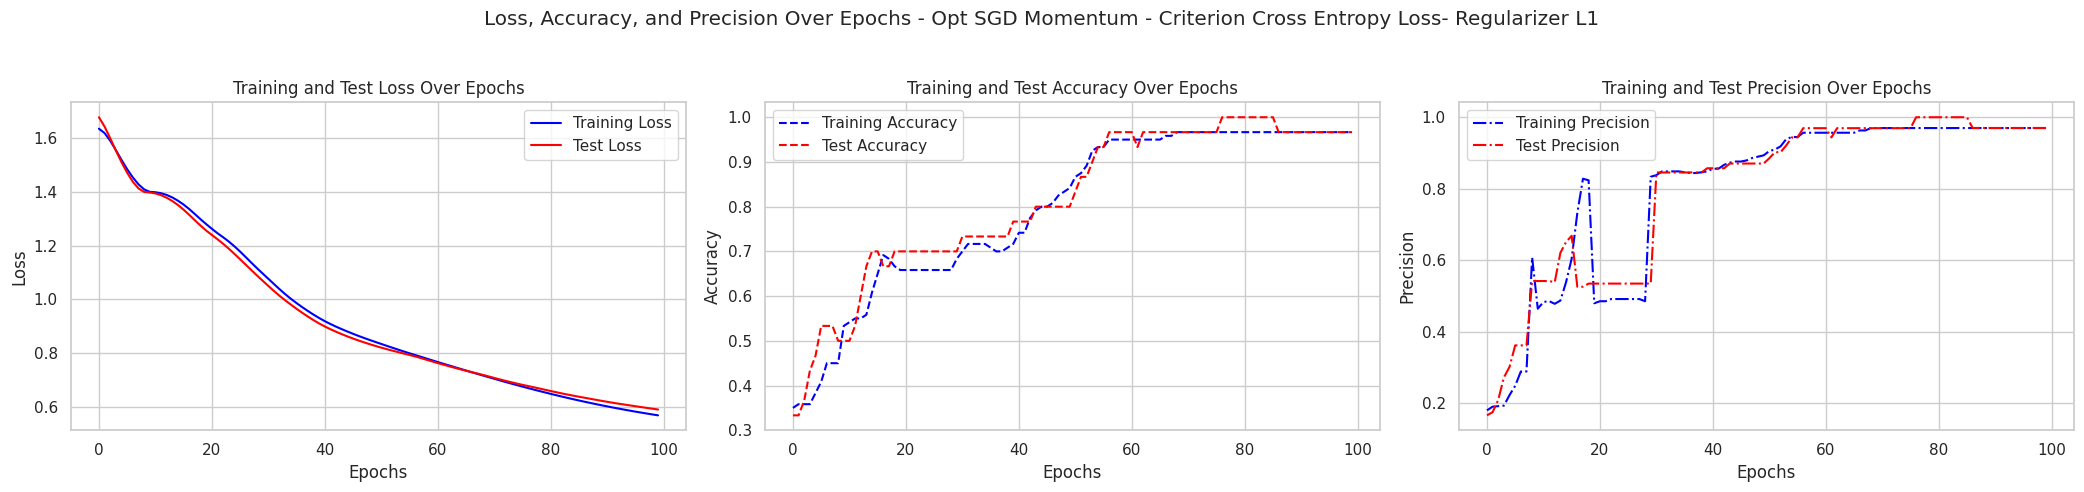

Opt SGD Momentum - Criterion Cross Entropy Loss- Regularizer L2
Tiempo de ejecución: 0.9916694100011227 segundos
Last train loss: 0.613389253616333
Last test loss: 0.5850008726119995
Last train accuracy: 0.6583333333333333
Last test accuracy: 0.7
Last train precision: 0.4698066188197767
Last test precision: 0.5153110047846889


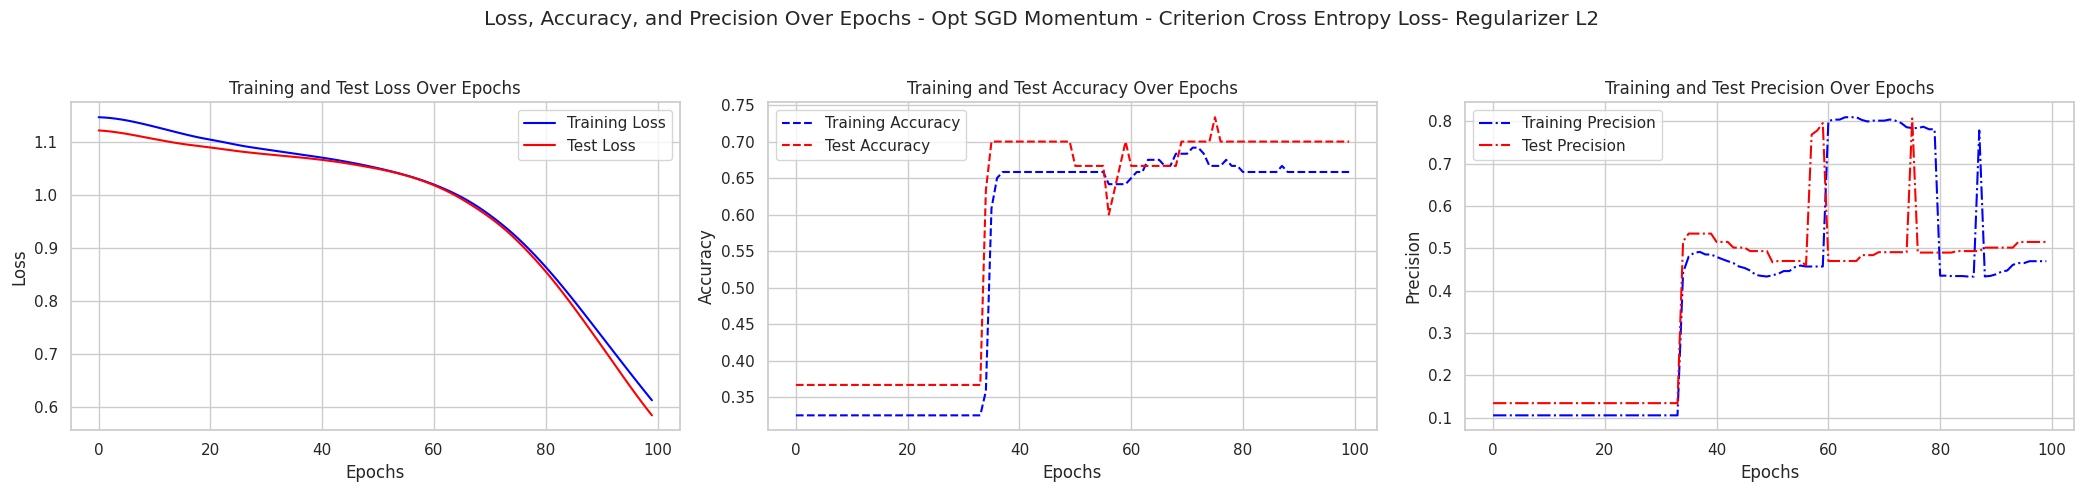

Opt SGD Momentum - Criterion Cross Entropy Loss- Regularizer Dropout
Tiempo de ejecución: 0.8693112790006126 segundos
Last train loss: 0.5970974564552307
Last test loss: 0.31594958901405334
Last train accuracy: 0.7416666666666667
Last test accuracy: 1.0
Last train precision: 0.7615082187450608
Last test precision: 1.0


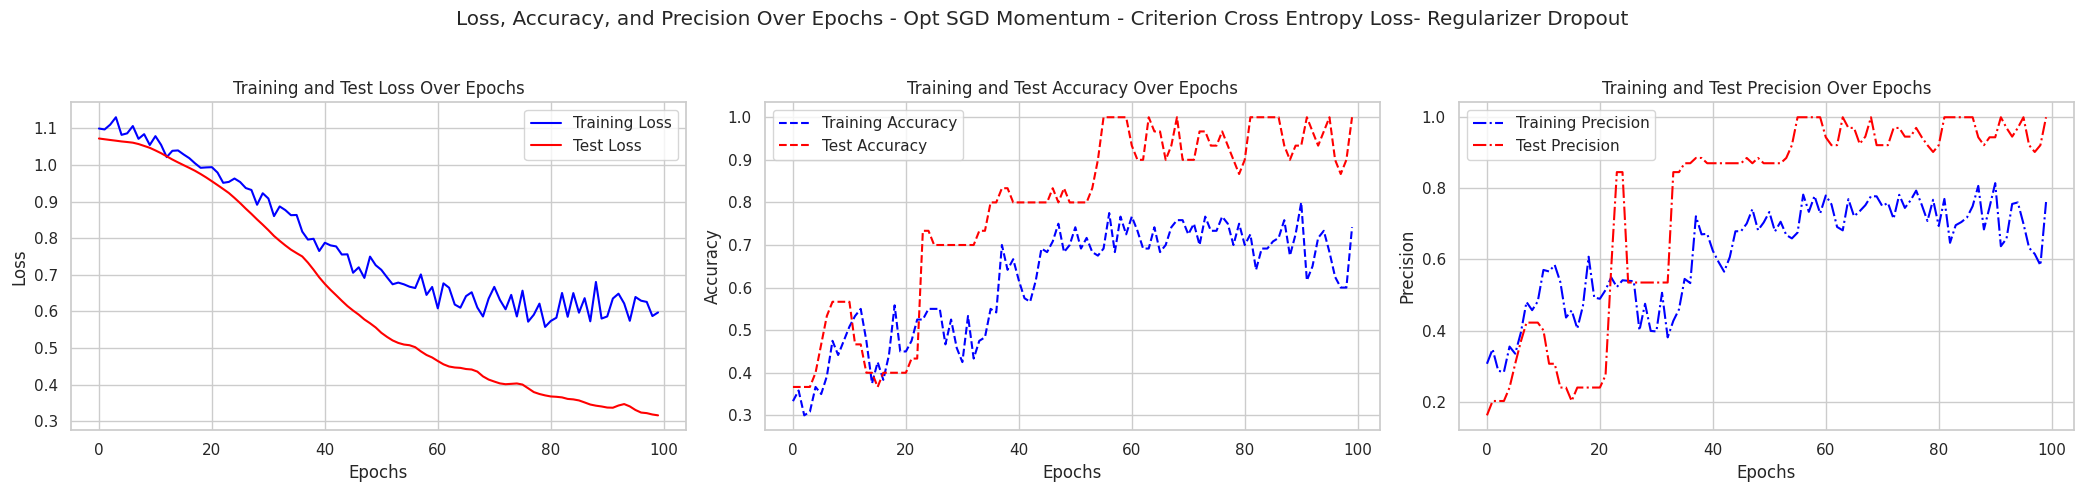

<Figure size 600x400 with 0 Axes>

In [104]:
def adamGenerator(model):
    return torch.optim.Adam(model.parameters(), lr=learning_rate)

def rmspropGenerator(model):
    return torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.9, eps=1e-8)

def sgd_momentumGenerator(model):
    return torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

optimizers = {
    "Adam": adamGenerator,
    "RMS Prop" : rmspropGenerator,
    "SGD Momentum": sgd_momentumGenerator
}

# Loss functions
loss_functions_ = {
    "Cross Entropy Loss": nn.CrossEntropyLoss()
}

# Regularizers
regularizers = [None, 'l1', 'l2', 'dropout']

# Call the test_combinations function
test_combinations(modelGenerator, X_train, y_train, X_test, y_test, optimizers, loss_functions_, regularizers)

### **(9) Experiment diferent models with different parameters.**

## **[Part 2]**

**Sección de Preguntas y Respuestas**

1. **¿Cuál es la principal innovación de la arquitectura Transformer?**

> - Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed eleifend vulputate est. Phasellus ornare eu ipsum vel ullamcorper. Duis pretium libero quis enim sollicitudin accumsan. Sed porttitor metus purus, vel pulvinar ipsum ultrices eu. Donec egestas, eros quis lacinia ultrices, leo sem viverra nunc, nec rutrum sapien tellus et nisi. In hac habitasse platea dictumst. Vivamus vehicula venenatis justo non finibus.

2. **¿Cómo funciona el mecanismo de atención del scaled dot-product?**

> - Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed eleifend vulputate est. Phasellus ornare eu ipsum vel ullamcorper. Duis pretium libero quis enim sollicitudin accumsan. Sed porttitor metus purus, vel pulvinar ipsum ultrices eu. Donec egestas, eros quis lacinia ultrices, leo sem viverra nunc, nec rutrum sapien tellus et nisi. In hac habitasse platea dictumst. Vivamus vehicula venenatis justo non finibus.

3. **¿Por qué se utiliza la atención de múltiples cabezales en Transformer?**

> - Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed eleifend vulputate est. Phasellus ornare eu ipsum vel ullamcorper. Duis pretium libero quis enim sollicitudin accumsan. Sed porttitor metus purus, vel pulvinar ipsum ultrices eu. Donec egestas, eros quis lacinia ultrices, leo sem viverra nunc, nec rutrum sapien tellus et nisi. In hac habitasse platea dictumst. Vivamus vehicula venenatis justo non finibus.

4. **¿Cómo se incorporan los positional encodings en el modelo Transformer?**

> - Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed eleifend vulputate est. Phasellus ornare eu ipsum vel ullamcorper. Duis pretium libero quis enim sollicitudin accumsan. Sed porttitor metus purus, vel pulvinar ipsum ultrices eu. Donec egestas, eros quis lacinia ultrices, leo sem viverra nunc, nec rutrum sapien tellus et nisi. In hac habitasse platea dictumst. Vivamus vehicula venenatis justo non finibus.

5. **¿Cuáles son algunas aplicaciones de la arquitectura Transformer más allá de la machine translation?**

> - Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed eleifend vulputate est. Phasellus ornare eu ipsum vel ullamcorper. Duis pretium libero quis enim sollicitudin accumsan. Sed porttitor metus purus, vel pulvinar ipsum ultrices eu. Donec egestas, eros quis lacinia ultrices, leo sem viverra nunc, nec rutrum sapien tellus et nisi. In hac habitasse platea dictumst. Vivamus vehicula venenatis justo non finibus.
